<a href="https://colab.research.google.com/github/Anjali286/Adobe-GenSolve/blob/main/CURVETOPIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

*  **cv2:** For image processing tasks.
*  **numpy:** For handling arrays and numerical operations.
* **matplotlib.pyplot:** For displaying images.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**Load and Prepare the Image**



*   List itemcv2.imread(image_path, cv2.IMREAD_GRAYSCALE): Reads the image in grayscale.
* cv2.bitwise_not(image): Inverts the image colors (doodles turn white).
* cv2.threshold(inverted_image, 128, 255, cv2.THRESH_BINARY): Converts the image to black and white.
* cv2.resize(binary_image, (128, 128)): Resizes the image to a fixed size.




In [4]:
def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    inverted_image = cv2.bitwise_not(image)
    _, binary_image = cv2.threshold(inverted_image, 128, 255, cv2.THRESH_BINARY)
    resized_image = cv2.resize(binary_image, (128, 128))
    return resized_image

**Smooth and Fix Doodles**


*  cv2.GaussianBlur(image, (3, 3), 0): Blurs the image to smooth out noise.
* np.ones((3, 3), np.uint8): Creates a small square matrix for operations.
* cv2.morphologyEx(blurred_image, cv2.MORPH_CLOSE, kernel): Fills small gaps in the doodles.




In [5]:
def regularize_doodles(image):
    blurred_image = cv2.GaussianBlur(image, (3, 3), 0)
    kernel = np.ones((3, 3), np.uint8)
    regularized_image = cv2.morphologyEx(blurred_image, cv2.MORPH_CLOSE, kernel)
    return regularized_image

**Make Doodles Symmetrical**



*   cv2.flip(image, 1): Flips the image horizontally.
* cv2.addWeighted(image, 0.5, flipped_image, 0.5, 0): Averages the original and flipped images to make the doodle symmetrical.




In [9]:
def enforce_symmetry(image):
    flipped_image = cv2.flip(image, 1)
    symmetric_image = cv2.addWeighted(image, 0.5, flipped_image, 0.5, 0)
    return symmetric_image

**Complete and Refine Doodles**


*   cv2.dilate(image, kernel, iterations=1): Expands the doodles to fill in gaps.
* cv2.erode(dilated_image, kernel, iterations=1): Reduces the expanded areas to refine the doodle shapes.




In [7]:
def complete_doodles(image):
    kernel = np.ones((3, 3), np.uint8)
    dilated_image = cv2.dilate(image, kernel, iterations=1)
    eroded_image = cv2.erode(dilated_image, kernel, iterations=1)
    return eroded_image

**Show Both Images**




*   plt.figure(figsize=(10, 5)): Sets the figure size.
* plt.subplot(1, 2, 1): Prepares the layout for the original image.
* plt.imshow(original_image, cmap='gray'): Displays the original image.
* plt.subplot(1, 2, 2): Prepares the layout for the processed image.
* plt.imshow(processed_image, cmap='gray'): Displays the processed image.
* plt.show(): Shows the images side by side.


In [8]:
def display_images(original_image, processed_image):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(original_image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Processed Image')
    plt.imshow(processed_image, cmap='gray')
    plt.axis('off')

    plt.show()

**Main Function to Run Everything**
* load_and_preprocess_image(image_path): Prepare the image for processing.
* combine_features(preprocessed_image): Apply processing steps to the image.
* cv2.imread(image_path, cv2.IMREAD_GRAYSCALE): Load the original image.
* cv2.resize(original_image, (128, 128)): Resize the original image.
* display_images(original_image_resized, final_image): Show both the original and processed images.

In [10]:
def main(image_path):
    preprocessed_image = load_and_preprocess_image(image_path)
    final_image = combine_features(preprocessed_image)
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    original_image_resized = cv2.resize(original_image, (128, 128))
    display_images(original_image_resized, final_image)

**Run the Code**

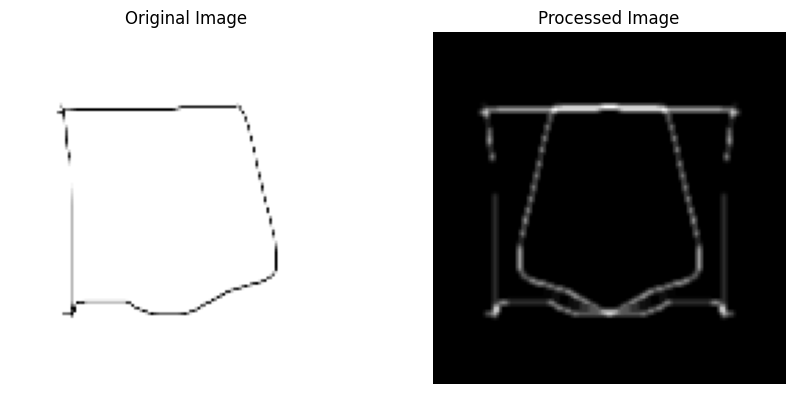

In [11]:
image_path = '/content/random.png'
main(image_path)
